# Predict the food delivery time

In [1]:
# Import usefull libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import folium

# filter out warning messages
warnings.filterwarnings("ignore")

## Load data and First EDA

In [2]:
data = pd.read_csv(r'../data/raw/delivery_time.csv')
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [3]:
data.shape

(45584, 20)

In [4]:
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [6]:
# ckeck for missing values
data.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

There are some columns with missing values

In [7]:
data.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [8]:
# lets create some features with the help of our existing features

feature = []
dtypes = []
count = []
unique = []
missing = []
missing_percentage=[]

for column in data.columns:
    feature.append(column)
    count.append(len(data[column]))
    missing.append(data[column].isnull().sum())
    unique.append(data[column].nunique())
    missing_percentage.append((data[column].isnull().sum() / data.shape[0]) * 100)
    dtypes.append(data[column].dtypes)
    
dataframe=pd.DataFrame({'feature':feature,
             'count':count,
             'missing':missing,
             'nunique':unique,
              'missing_percentage':missing_percentage,
              'dtypes':dtypes
              
             }) 
dataframe.set_index('feature')

,count,missing,nunique,missing_percentage,dtypes
feature,,,,,
ID,45584,0,45584,0.000000,object
Delivery_person_ID,45584,0,1320,0.000000,object
Delivery_person_Age,45584,1854,22,4.067217,float64
Delivery_person_Ratings,45584,1908,28,4.185679,float64
Restaurant_latitude,45584,0,657,0.000000,float64
Restaurant_longitude,45584,0,518,0.000000,float64
Delivery_location_latitude,45584,0,4373,0.000000,float64
Delivery_location_longitude,45584,0,4373,0.000000,float64
Order_Date,45584,0,44,0.000000,object


We can delete ID columns

In [9]:
data.drop('ID', axis=1, inplace=True)

## Changing the datetime column in datetime

In [10]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'], format='mixed')

In [11]:
data['Order_Date']

0       2022-12-02
1       2022-02-13
2       2022-04-03
3       2022-02-13
4       2022-02-14
           ...    
45579   2022-03-24
45580   2022-02-16
45581   2022-11-03
45582   2022-07-03
45583   2022-02-03
Name: Order_Date, Length: 45584, dtype: datetime64[ns]

Create new features for year, month and day

In [12]:
data['year']= data['Order_Date'].dt.year
data['month']= data['Order_Date'].dt.month
data['day']= data['Order_Date'].dt.day

In [13]:
data.head(2)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,21:55,22:10,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,12,2
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13


Remove order date column

In [14]:
data.drop('Order_Date',axis=1,inplace=True)

Remove null values in time ordered column

In [15]:
data.dropna(subset=['Time_Orderd'], inplace=True)

In [16]:
data['Time_Orderd'] = data['Time_Orderd'].str.replace('.', ':')# 12:00 12.00 12:00

In [17]:
data['Time_Orderd'].sample(10)

1462     17:45
22351    18:50
16276    17:35
11721    21:40
36958    21:20
30177    19:40
13602    20:45
14205     0:75
29144    18:20
24919    22:50
Name: Time_Orderd, dtype: object

It is possible that we can have wrong cell values in time columns

In [18]:
# Define a lambda function with error handling

def extract_time(x):
    try:
        return x.split(':')[0] + ':' + x.split(':')[1][:2]
    except IndexError:
        return '00:00'

# Apply the lambda function to the Order_Time column
data['Time_Orderd'] = data['Time_Orderd'].apply(extract_time)

In [19]:
# Convert the Order_Time column to a time data type
data['Time_Orderd'] = pd.to_datetime(data['Time_Orderd'], format='%H:%M:%S',errors='ignore')

In [20]:
data['TimeOrder_Hour']=data['Time_Orderd'].str.split(':',expand=True)[0] # 12:00 -> 12, 00


In [21]:
# replacing '0' with '00'  - both indicate 24th hr 
data['TimeOrder_Hour']=data['TimeOrder_Hour'].replace('0','00') #12:00

# changing the datatype
data['TimeOrder_Hour']=data['TimeOrder_Hour'].astype('int32')

In [22]:
# order_minute
data['TimeOrder_min']=data['Time_Orderd'].str.split(':',expand=True)[1]

# changing the datatype
data['TimeOrder_min']=data['TimeOrder_min'].astype('int32')

In [23]:
data.head(2)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,motorcycle,3.0,No,Metropolitian,46,2022,12,2,21,55
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,motorcycle,1.0,No,Metropolitian,23,2022,2,13,14,55


Do the same for time_order_picked column

In [24]:
data['Time_Order_picked'] = data['Time_Order_picked'].str.replace('.', ':')

In [25]:
# Define a lambda function with error handling
def extract_time(x):
    try:
        return x.split(':')[0] + ':' + x.split(':')[1][:2]
    except IndexError:
        return '00:00'

# Apply the lambda function to the Order_Time column
data['Time_Order_picked'] = data['Time_Order_picked'].apply(extract_time)

In [26]:
# Convert the Order_Time column to a time data type
data['Time_Order_picked'] = pd.to_datetime(data['Time_Order_picked'], format='%H:%M:%S',errors='ignore')

In [27]:
data['Time_Order_picked_Hour']=data['Time_Order_picked'].str.split(':',expand=True)[0]

In [28]:
# changing the datatype
data['Time_Order_picked_Hour']=data['Time_Order_picked_Hour'].astype('int32')

In [29]:
# order_minute
data['Time_Order_picked_min']=data['Time_Order_picked'].str.split(':',expand=True)[1]

In [30]:
# changing the datatype
data['Time_Order_picked_min']=data['Time_Order_picked_min'].astype('int32')

Extracting city from delivery person id

In [31]:
data['Delivery_city']=data['Delivery_person_ID'].str.split('RES',expand=True)[0]


In [32]:
data.head(2)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,Metropolitian,46,2022,12,2,21,55,22,10,DEH
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,Metropolitian,23,2022,2,13,14,55,15,5,KOC


In [33]:
data['Delivery_city'].unique()

array(['DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'MYS', 'HYD', 'KOL',
       'RANCHI', 'COIMB', 'CHEN', 'JAP', 'SUR', 'BANG', 'GOA', 'AURG',
       'AGR', 'VAD', 'ALH', 'BHP', 'INDO'], dtype=object)

In [34]:
data.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city'],
      dtype='object')

filling the null value with the mean of that person id

In [35]:
rating_map = round(data.groupby('Delivery_person_ID')['Delivery_person_Ratings'].mean(),1).to_dict()

data['Delivery_person_Ratings']=data['Delivery_person_Ratings'].fillna(data['Delivery_person_ID'].map(rating_map))

# fillup the missing value in delivery_person_rating with the help of mean value of every delivery_person_id

In [36]:
data['Delivery_person_Ratings'].isnull().sum()

np.int64(0)

working with map

In [37]:
folium.Map(tiles='cartodb positron')

Working with Latitude and Longitude

In [38]:
# plotting the latitude and loggitude
import plotly.express as px
data1 = data.copy()
data1.dropna(axis=0,how='any',subset=None,inplace=True)
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(data1, lat="Restaurant_latitude", lon="Restaurant_longitude", color_continuous_scale=color_scale,zoom=8, 
                        height=1000,width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

latitude of india is 8°4` N  to 37°6` North
longitude of india is 68°7` E to 97°25` East

this data set is realted to india. but in some of latitidude is given in negative(-), negative lattitude is related o indian ocean ..
so that there is much chances that negative sign in lattitude is by mistake

In [39]:
data['Restaurant_latitude'] = data['Restaurant_latitude'].abs()

## To calculate the distance between two points on a sphere (such as the Earth), we can use the Haversine formula

In [40]:
import math

def distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    R = 6371.0 # Earth's radius in km
    dist = R * c
    
    return dist
data['distance'] = data.apply(lambda row: distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

In [41]:
data.groupby(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'])['distance'].max().head(40)


Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  Delivery_location_longitude
0.000000             0.000000              0.010000                    0.010000                        1.572534
                                           0.020000                    0.020000                        3.145067
                                           0.030000                    0.030000                        4.717601
                                           0.040000                    0.040000                        6.290135
                                           0.050000                    0.050000                        7.862668
                                           0.060000                    0.060000                        9.435202
                                           0.070000                    0.070000                       11.007735
                                           0.080000                    0.080000                       12.580268
     

droping those lattitude and longitude which are less than and above to latitude of india is 8°4` N  to 37°6` North longitude of india is 68°7` E to 97°25` East

In [42]:
data[(data['Restaurant_latitude'] < 8) & (data['Delivery_location_latitude'] < 8)].shape

(3509, 27)

In [43]:
# droping  where  restaurant_lattitude and delivery_location_latitude less than 8

data = data.drop(data[(data['Restaurant_latitude'] < 8) & (data['Delivery_location_latitude'] < 8)].index)

In [44]:
data.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city', 'distance'],
      dtype='object')

Find the minimum distance

In [45]:
min_distance=data.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                        'Delivery_location_longitude']].min().sort_values(by='distance',ascending=True).head(1)
min_distance

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
distance,,,,
1.465067,30.914057,75.83982,30.924057,75.84982


In [46]:
import folium
from branca.element import Figure
fig2=Figure(width=850,height=550)

# Create a map object centered on a specific location
m = folium.Map(location=[30.914057, 75.83982], zoom_start=12)

# Add a marker for the restaurant location
folium.Marker(location=[30.914057, 75.83982], popup="Restaurant",icon=folium.Icon(color='purple',prefix='fa',icon='anchor')).add_to(m)

# Add a marker for the delivery location
folium.Marker(location=[30.924057, 75.84982], popup="Delivery").add_to(m)

# Draw a line between the two locations
folium.PolyLine(locations=[[30.914057, 75.83982], [30.924057, 75.84982]], color='red').add_to(m)

# Display the map

fig2.add_child(m)
folium.TileLayer('Stamen Terrain', attr="Mapbox attribution").add_to(m)
folium.TileLayer('Stamen Toner', attr="Mapbox attribution").add_to(m)
folium.TileLayer('Stamen Water Color', attr="Mapbox attribution").add_to(m)
folium.TileLayer('cartodbpositron', attr="Mapbox attribution").add_to(m)
folium.TileLayer('cartodbdark_matter', attr="Mapbox attribution").add_to(m)
folium.LayerControl().add_to(m)
m

Find the maximun distance

In [47]:
max_distance=data.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                        'Delivery_location_longitude']].max().sort_values(by='distance',ascending=False).head(1)
max_distance

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
distance,,,,
20.969489,25.443994,81.860187,25.583994,82.000187


In [48]:
tooltips=f"Distance: {data['distance'].max()} km"

In [49]:
import folium
from branca.element import Figure
fig2=Figure(width=850,height=550)

# Create a map object centered on a specific location
m = folium.Map(location=[25.443994, 81.860187], zoom_start=12)

# Add a marker for the restaurant location
folium.Marker(location=[25.443994, 81.860187], popup="Restaurant",icon=folium.Icon(color='purple',prefix='fa',icon='anchor')).add_to(m)

# Add a marker for the delivery location
folium.Marker(location=[25.583994, 82.000187], popup="Delivery").add_to(m)

# Draw a line between the two locations
folium.PolyLine(locations=[[25.443994, 81.860187], [25.583994,82.000187]], color='red',tooltip=tooltips).add_to(m)

# Display the map

fig2.add_child(m)
folium.TileLayer('Stamen Terrain', attr="Mapbox attribution").add_to(m)
folium.TileLayer('Stamen Toner', attr="Mapbox attribution").add_to(m)
folium.TileLayer('Stamen Water Color', attr="Mapbox attribution").add_to(m)
folium.TileLayer('cartodbpositron', attr="Mapbox attribution").add_to(m)
folium.TileLayer('cartodbdark_matter', attr="Mapbox attribution").add_to(m)
folium.LayerControl().add_to(m)
m

Plot latitude and longitude

In [50]:
# plotting the lattitude and loggitude
import plotly.express as px
data1 = data.copy()
data1.dropna(axis=0,how='any',subset=None,inplace=True)
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(data1, lat="Restaurant_latitude", lon="Restaurant_longitude", color_continuous_scale=color_scale,zoom=8, 
                        height=1000,width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Visualization

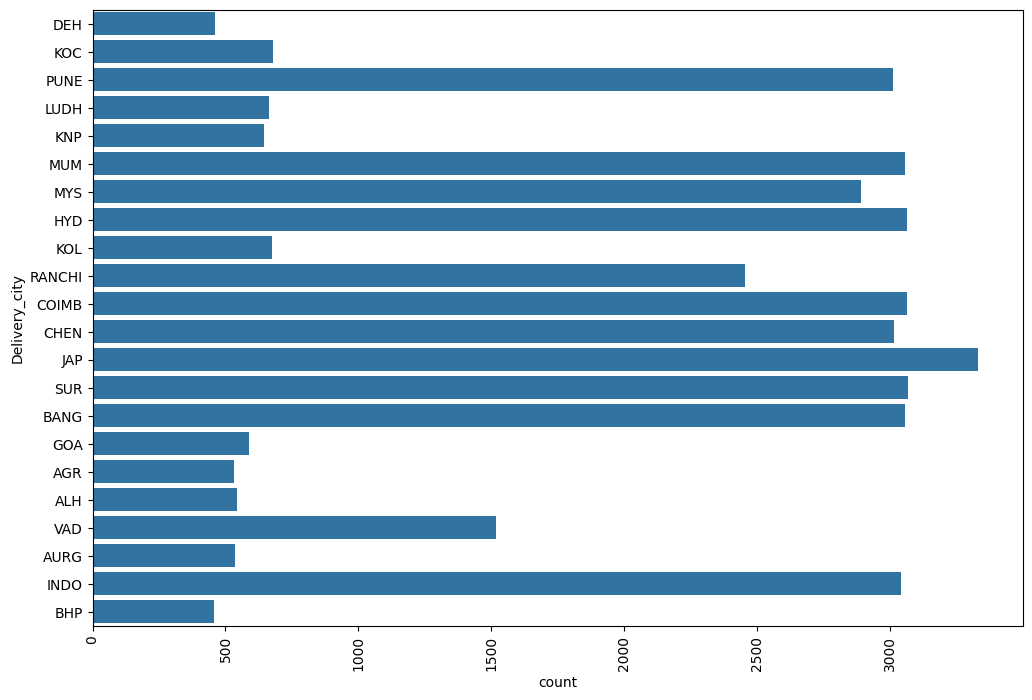

In [51]:
plt.figure(figsize=(12,8))
sns.countplot(data['Delivery_city'])
plt.xticks(rotation='vertical')
plt.show()

cities like-  pune, mumbai, mysore, hyderabaad , chennai, banglore, indore, ranchi in these cities more no. of food is ordered

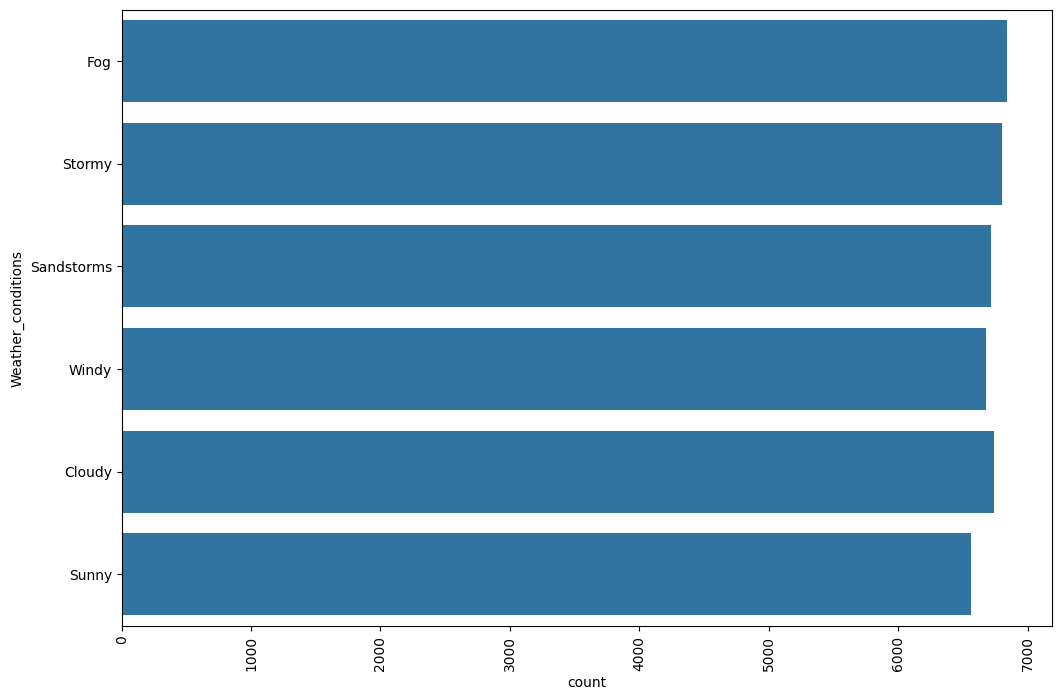

In [52]:
plt.figure(figsize=(12,8))
sns.countplot(data['Weather_conditions'])
plt.xticks(rotation='vertical')
plt.show()

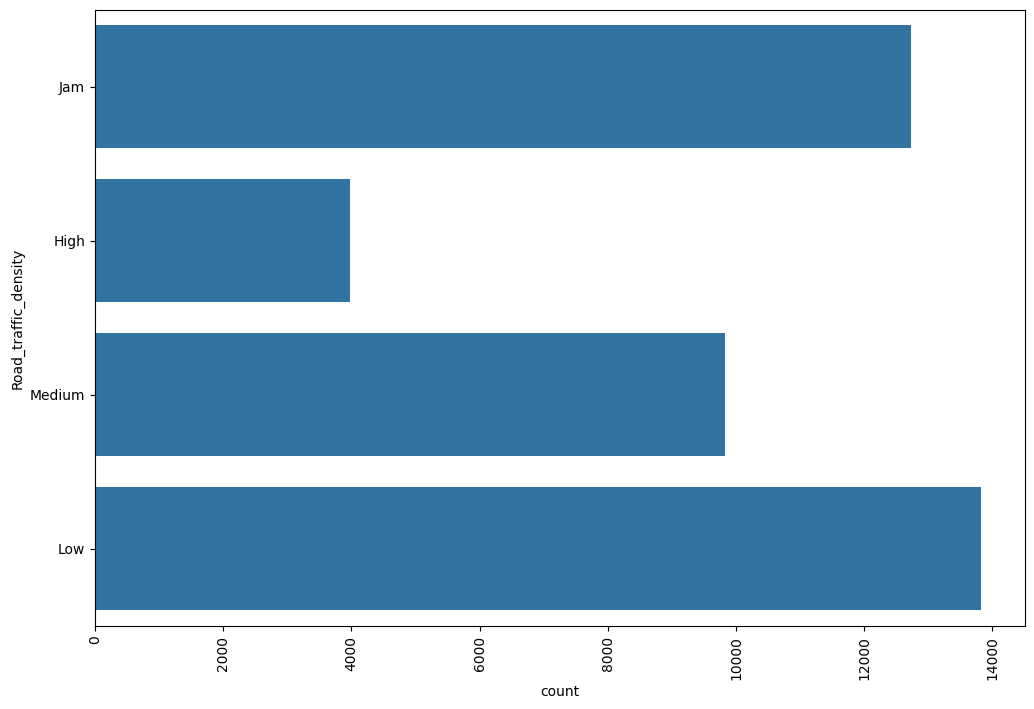

In [53]:
plt.figure(figsize=(12,8))
sns.countplot(data['Road_traffic_density'])
plt.xticks(rotation='vertical')
plt.show()

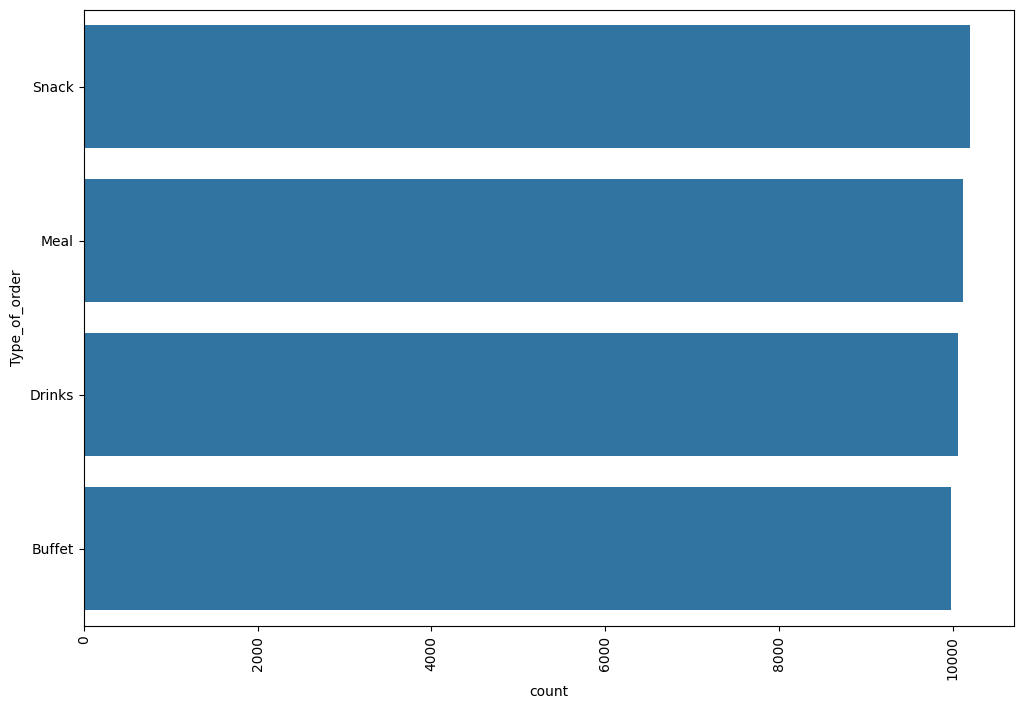

In [54]:
plt.figure(figsize=(12,8))
sns.countplot(data['Type_of_order'])
plt.xticks(rotation='vertical')
plt.show()

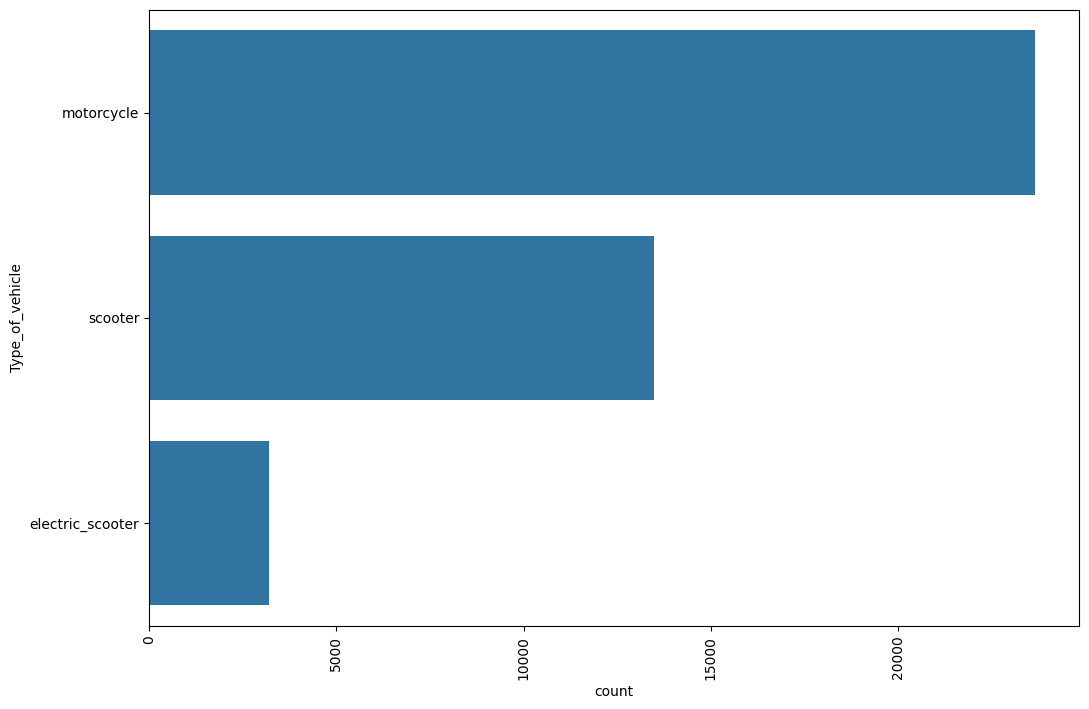

In [55]:
plt.figure(figsize=(12,8))
sns.countplot(data['Type_of_vehicle'])
plt.xticks(rotation='vertical')
plt.show()

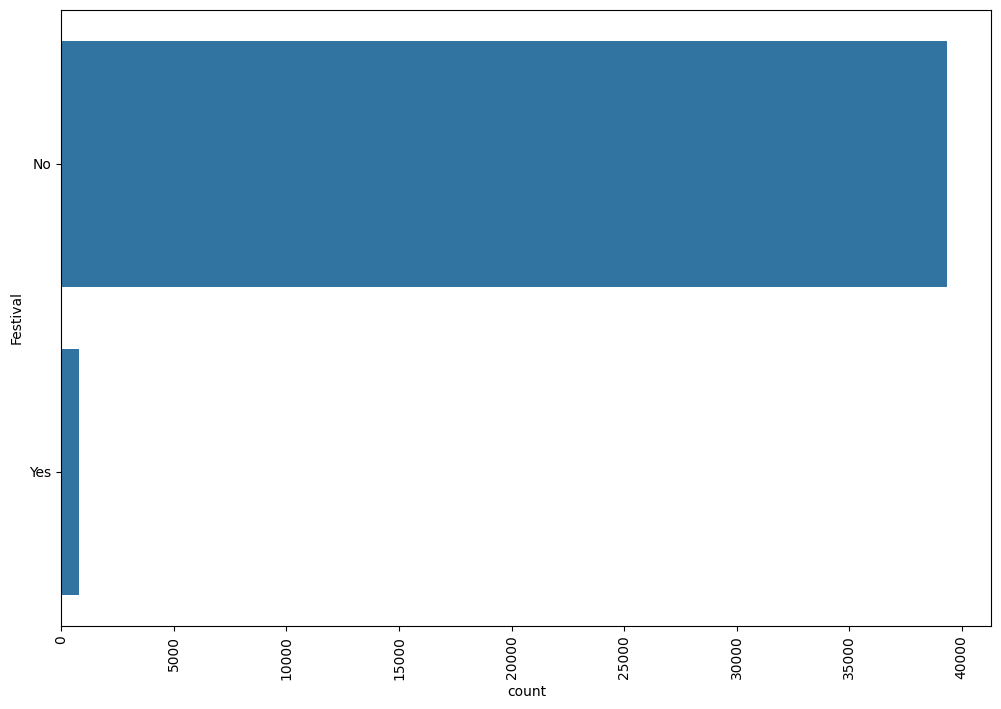

In [56]:
plt.figure(figsize=(12,8))
sns.countplot(data['Festival'])
plt.xticks(rotation='vertical')
plt.show()

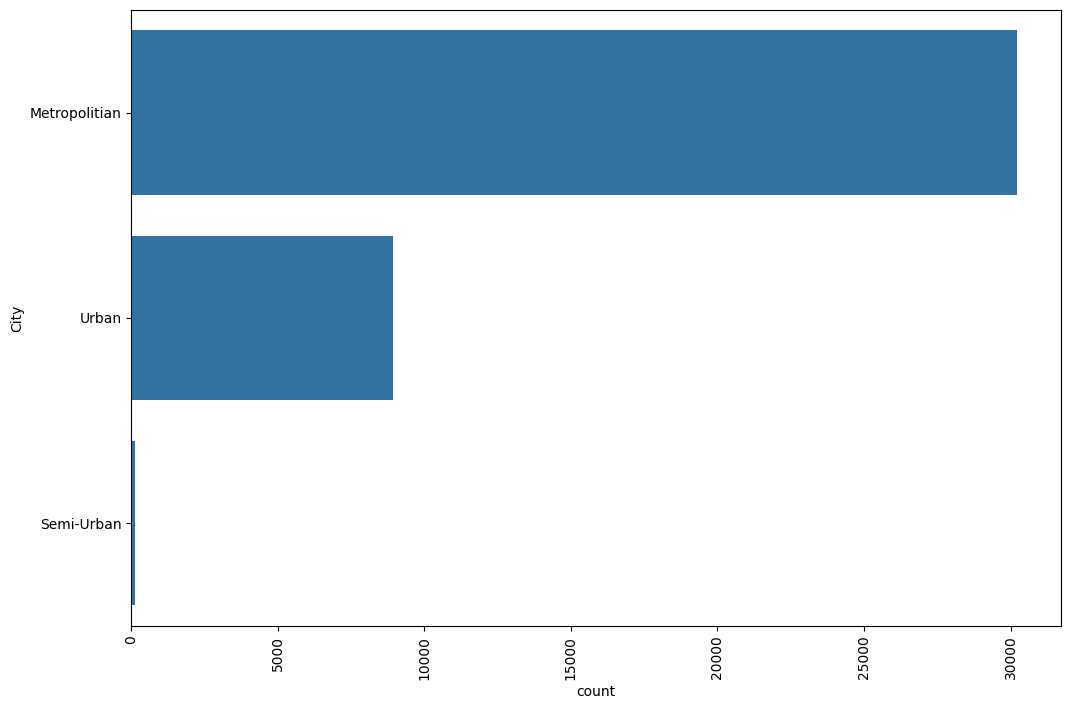

In [57]:
plt.figure(figsize=(12,8))
sns.countplot(data['City'])
plt.xticks(rotation='vertical')
plt.show()

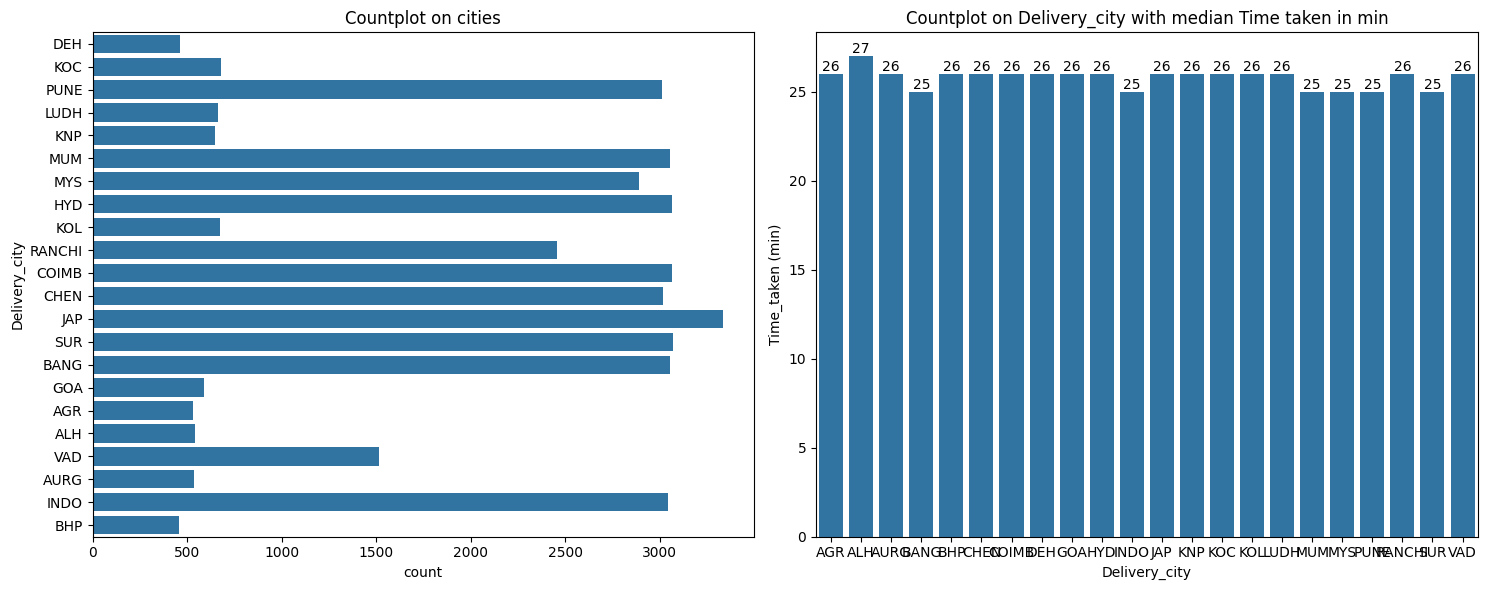

In [58]:
# plotting a countplot of Festival and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(data['Delivery_city'])
plt.title("Countplot on cities")

plt.subplot(1,2,2)
data1 = data.groupby(['Delivery_city'])["Time_taken (min)"].median().reset_index()
ax = sns.barplot(x='Delivery_city', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Delivery_city with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

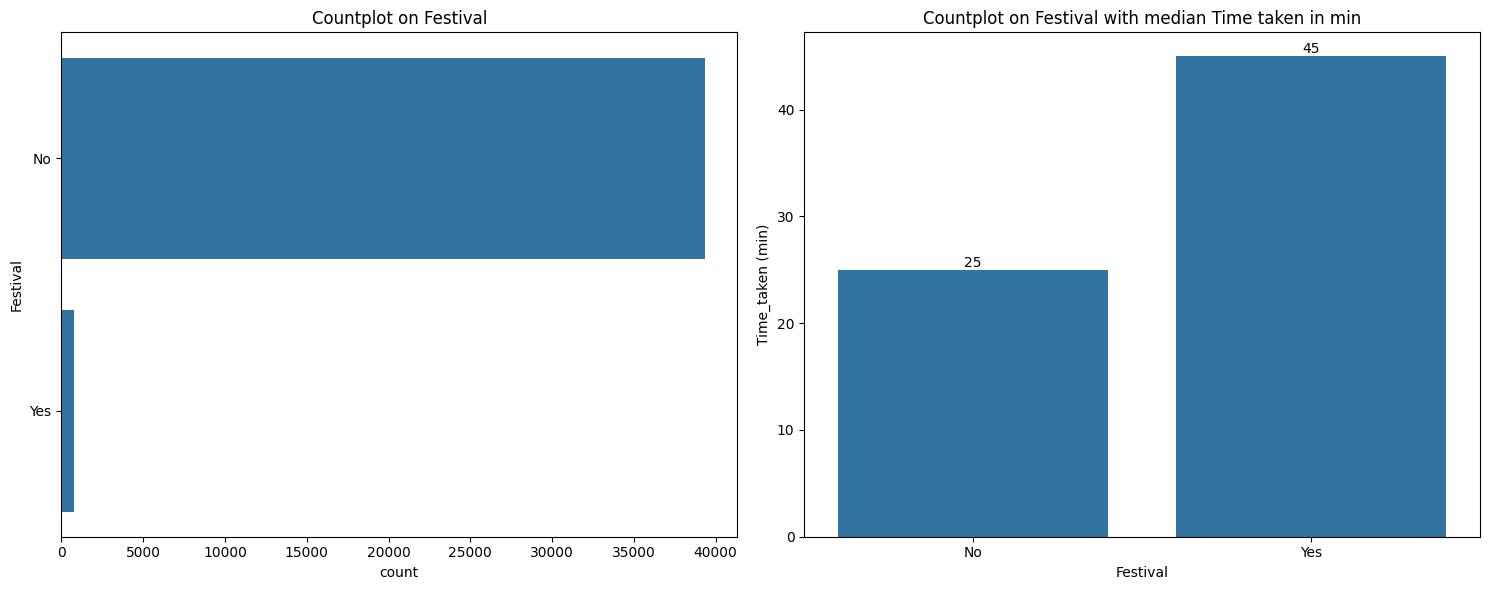

In [59]:
# plotting a countplot of Festival and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(data['Festival'])
plt.title("Countplot on Festival")

plt.subplot(1,2,2)
data1 = data.groupby(['Festival'])['Time_taken (min)'].median().reset_index()
ax = sns.barplot(x='Festival', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Festival with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

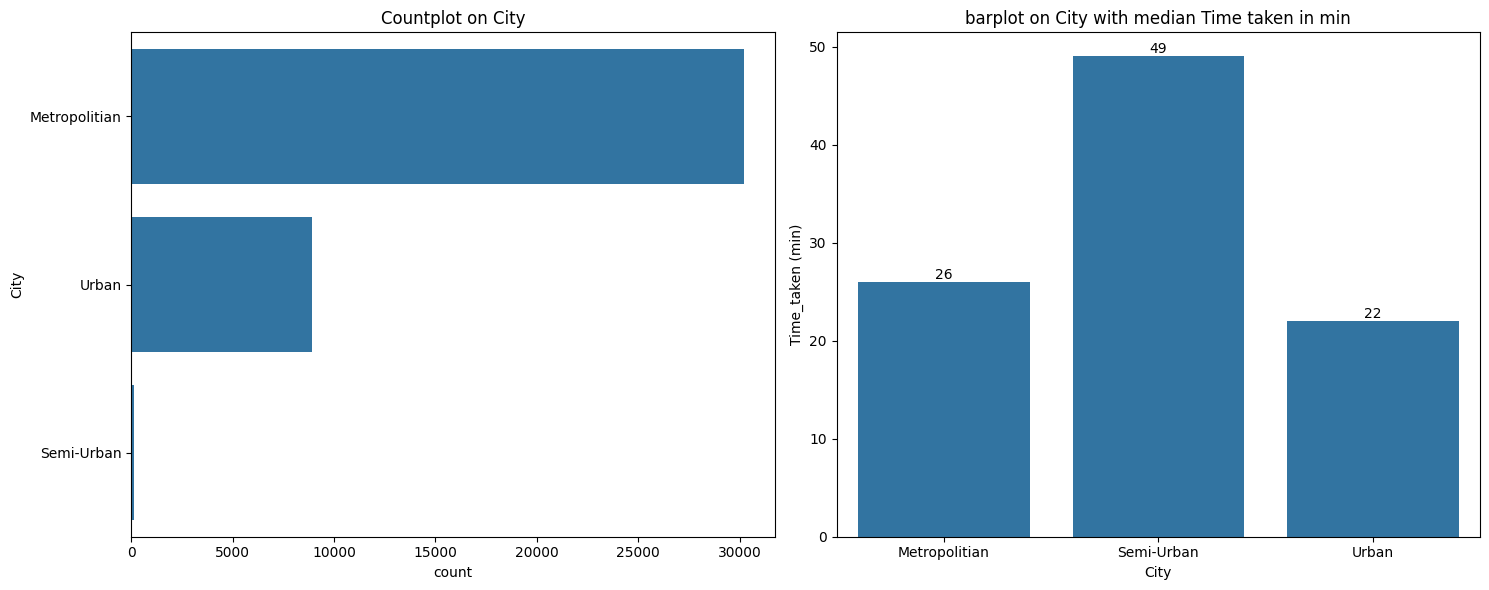

In [60]:
# plotting a countplot of City and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(data['City'])
plt.title("Countplot on City")

plt.subplot(1,2,2)
data1 = data.groupby(['City'])['Time_taken (min)'].median().reset_index()
ax = sns.barplot(x='City', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('barplot on City with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

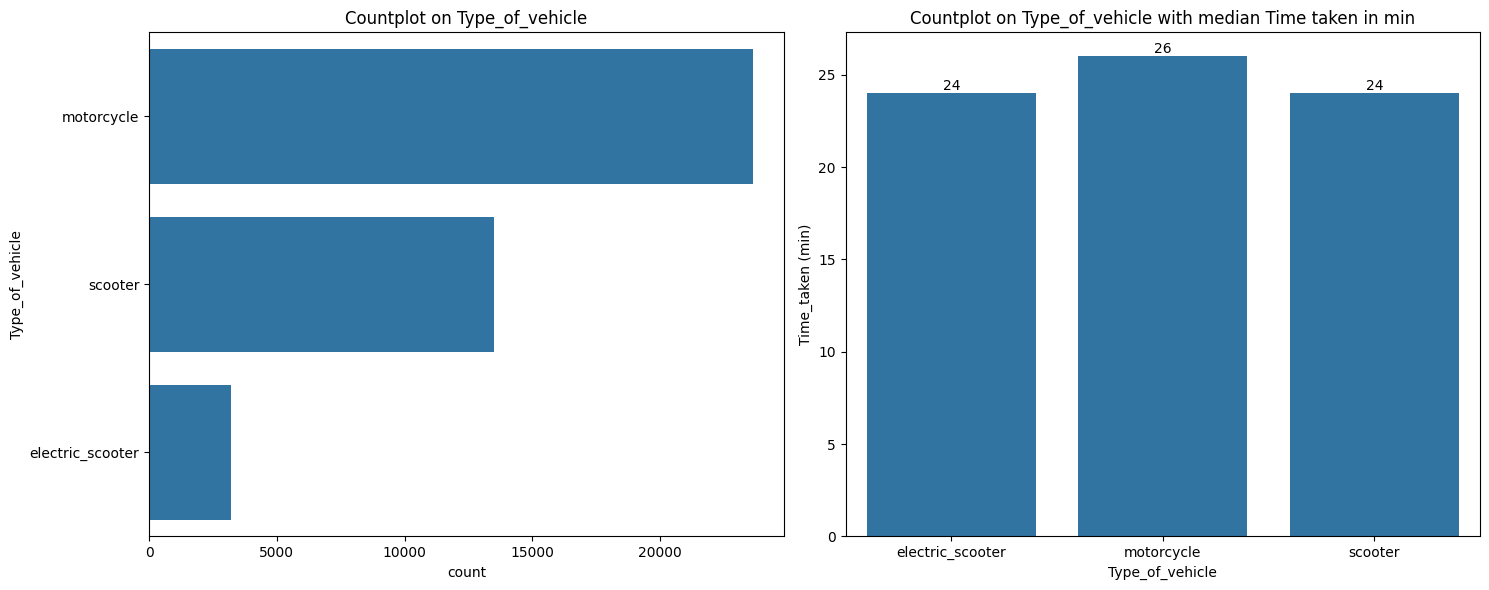

In [61]:
# plotting a countplot of Type_of_vehicle and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(data['Type_of_vehicle'])
plt.title("Countplot on Type_of_vehicle")

plt.subplot(1,2,2)
data1 = data.groupby(['Type_of_vehicle'])['Time_taken (min)'].median().reset_index()
ax = sns.barplot(x='Type_of_vehicle', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Type_of_vehicle with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

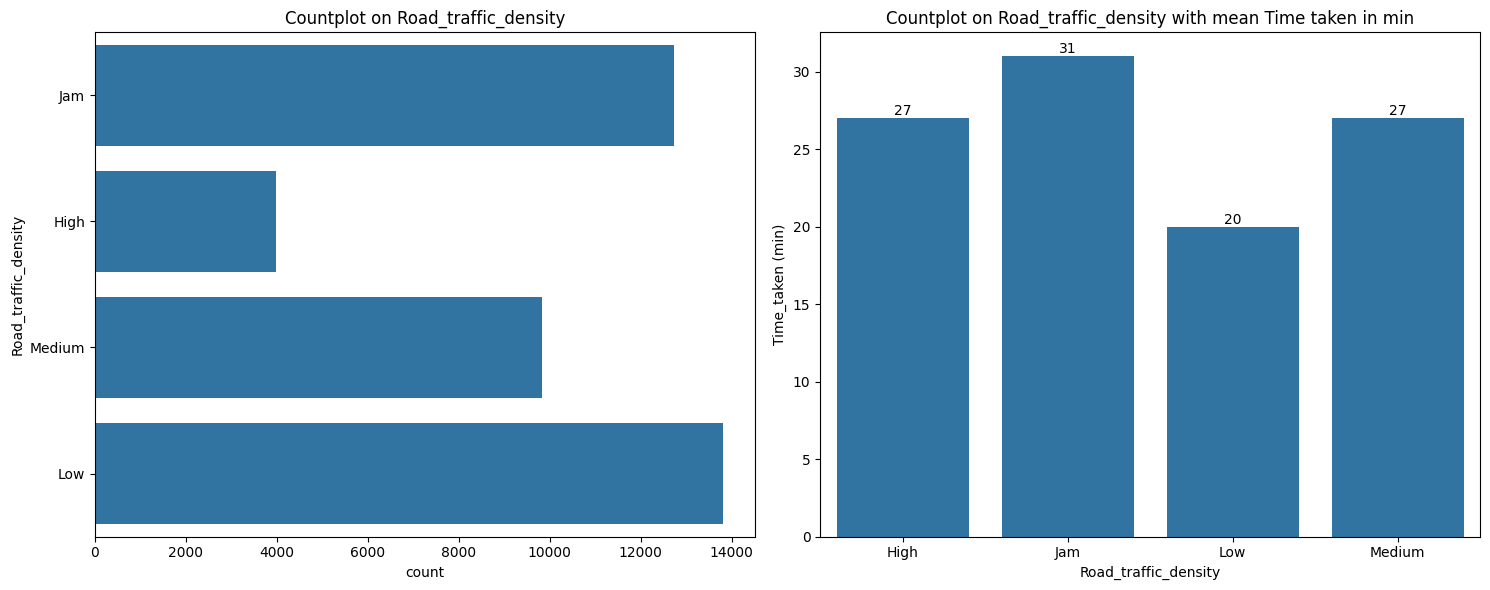

In [62]:
# plotting a countplot of Road traffic density and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(data['Road_traffic_density'])
plt.title("Countplot on Road_traffic_density")

plt.subplot(1,2,2)
data1 = data.groupby(['Road_traffic_density'])['Time_taken (min)'].median().reset_index()
ax = sns.barplot(x='Road_traffic_density', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Road_traffic_density with mean Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

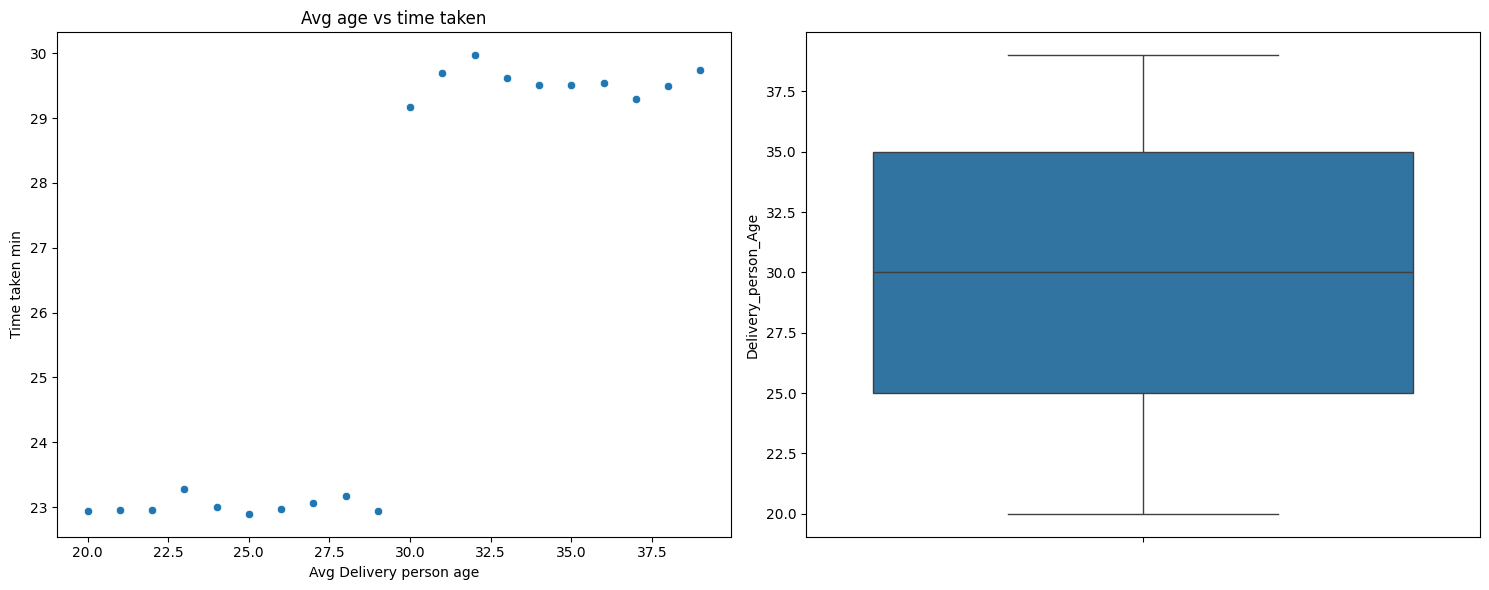

In [63]:
# The avg delivery person age w.r.t Time taken in min
data1 = data.groupby(['Delivery_person_Age'])["Time_taken (min)"].mean().reset_index()

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot(x='Delivery_person_Age',y='Time_taken (min)',data=data1)
plt.xlabel('Avg Delivery person age')
plt.ylabel("Time taken min")
plt.title('Avg age vs time taken')

plt.subplot(1,2,2)
sns.boxplot(y=data['Delivery_person_Age'])
plt.tight_layout()
plt.show()

as the age is increses the time of delivery is also inc.

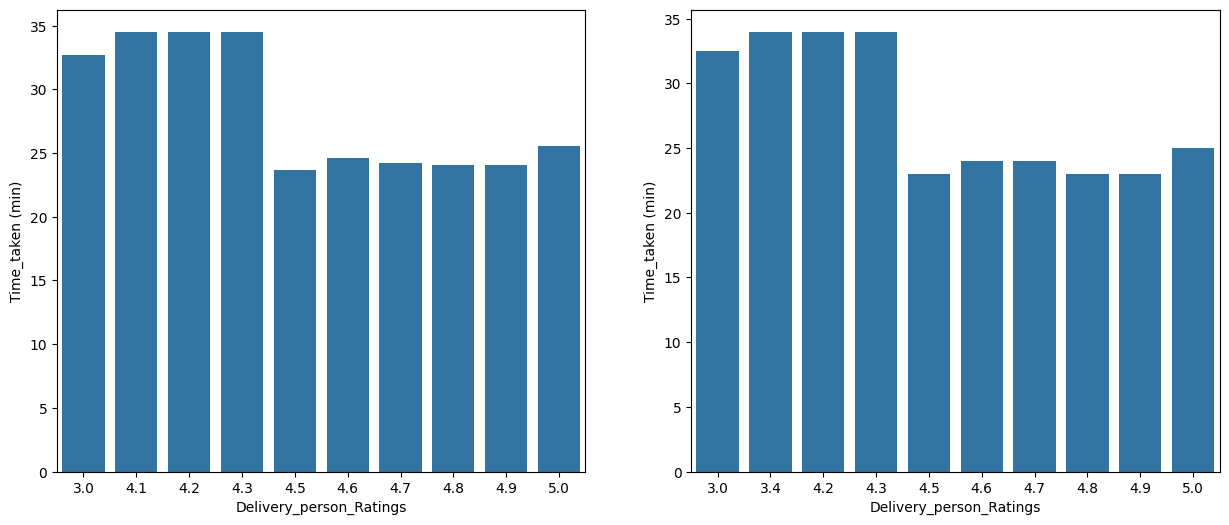

In [64]:
data1 = data.groupby(['Delivery_person_Ratings'])['Time_taken (min)'].mean().reset_index()
data1.sort_values('Time_taken (min)',inplace=True)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=data1.head(10),x='Delivery_person_Ratings',y='Time_taken (min)')

data2 = data.groupby(['Delivery_person_Ratings'])['Time_taken (min)'].median().reset_index()
data2.sort_values('Time_taken (min)',inplace=True)
plt.subplot(1,2,2)
sns.barplot(data=data2.head(10),x='Delivery_person_Ratings',y='Time_taken (min)')
plt.show()

person with lower rating is taking more time

In [65]:
data.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age             200
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                       0
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             855
Festival                        206
City                           1059
Time_taken (min)                  0
year                              0
month                             0
day                               0
TimeOrder_Hour                    0
TimeOrder_min                     0
Time_Order_picked_Hour            0
Time_Order_picked_min             0
Delivery_city                     0
distance                          0
dtype: int64

In [66]:
data['multiple_deliveries'].dtypes

dtype('float64')

Drop unnecessary columns

In [67]:
data.drop(['Time_Orderd','Time_Order_picked', 'Delivery_person_ID'],axis=1,inplace=True)

In [68]:
data.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city', 'distance'],
      dtype='object')

In [69]:
data.dtypes

Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
year                             int32
month                            int32
day                              int32
TimeOrder_Hour                   int32
TimeOrder_min                    int32
Time_Order_picked_Hour           int32
Time_Order_picked_min            int32
Delivery_city                   object
distance                       float64
dtype: object

Checking variables types

In [70]:

num_col=[feature for feature in data.columns if data[feature].dtypes != 'O']
cat_col=[feature for feature in data.columns if data[feature].dtypes == 'O']

In [71]:
num_col

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)',
 'year',
 'month',
 'day',
 'TimeOrder_Hour',
 'TimeOrder_min',
 'Time_Order_picked_Hour',
 'Time_Order_picked_min',
 'distance']

In [72]:
cat_col

['Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City',
 'Delivery_city']

# Modelling

Import packages

In [78]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split

Drop unnecessary columns

In [74]:
data.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude',
        'year','month','day','TimeOrder_min','Time_Order_picked_Hour','Time_Order_picked_min'],axis=1,inplace=True)

Split into X and Y

In [75]:
X = data.drop(labels=['Time_taken (min)'],axis=1)
y = data[['Time_taken (min)']]

This ranking is based on the potential danger and impact each condition may have on daily activities and travel. Stormy conditions can bring heavy rain, strong winds, and lightning, posing the highest risk. Sandstorms can cause respiratory problems and limit visibility, while fog and windy conditions can make driving hazardous. Cloudy conditions can indicate upcoming storms or weather changes, and sunny conditions are generally considered the least severe.

In [76]:

Road_traffic_density=['Low','Medium','High','Jam']
Weather_conditions=['Sunny','Cloudy','Windy','Fog','Sandstorms','Stormy']

In [77]:
categorical_column=['Type_of_order','Type_of_vehicle','Festival','City','Delivery_city']
ordinal_encod=['Road_traffic_density','Weather_conditions']
numerical_column=['Delivery_person_Age','Delivery_person_Ratings','Vehicle_condition','multiple_deliveries',
                  'TimeOrder_Hour','distance']

## Build the pipeline

In [79]:
# numerical pipeline

numerical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='constant',fill_value=0)),
    ('scaler',StandardScaler(with_mean=False))
])

# categorical pipeline

categorical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore')),
    ('scaler',StandardScaler(with_mean=False))
])

# ordinal pipeline

ordianl_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ordinal',OrdinalEncoder(categories=[Road_traffic_density,Weather_conditions])),
    ('scaler',StandardScaler(with_mean=False))   
])

In [80]:
preprocessor =ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline,numerical_column),
    ('categorical_pipeline',categorical_pipeline,categorical_column),
    ('ordianl_pipeline',ordianl_pipeline,ordinal_encod)
])

Split train and test

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [82]:
X_train=preprocessor.fit_transform(X_train)


In [83]:
X_test=preprocessor.transform(X_test)


Go to algorithms

In [85]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 

from xgboost import XGBRegressor



from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

Evaluate the model

In [86]:
def evaluate_reg(true, predicted):
    r2 = r2_score(true, predicted) # Calculate r2 score
    MAE = mean_absolute_error(true, predicted) # Calculate MAE
    MSE = mean_squared_error(true, predicted) # Calculate MSE
    rmse = np.sqrt(mean_squared_error(true, predicted))
   
    return r2, MAE , MSE,rmse

In [88]:
# set the models
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "linear Regression": LinearRegression(),
    "Ridge":Ridge(),
    "XGBRegressor": XGBRegressor(), 
  
}

In [89]:
r2_list=[]
mse_list=[]
models_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    

    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)



    # Test set performance
    r2,MAE,MSE,rmse=evaluate_reg(y_test, y_test_pred)
    r2_train,MAE_train,MSE_train,rmse_train=evaluate_reg(y_train, y_train_pred)
    

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    

    
    print('Model performance for Test set')
    print('- r2_score: {:.4f}'.format(r2))
    print('- MAE: {:.4f}'.format(MAE))
    print('- MSE: {:.4f}'.format(MSE))
    print('- rmse: {:.4f}'.format(rmse))
    r2_list.append(r2)
    mse_list.append(MSE)
    
    print('-'*35)
        
    print('Model performance for train set')
    print('- r2_score: {:.4f}'.format(r2_train))
    print('- MAE: {:.4f}'.format(MAE_train))
    print('- MSE: {:.4f}'.format(MSE_train))
    print('- rmse: {:.4f}'.format(rmse_train))

    print('='*35)
    print('='*35)
    print('\n')

Random Forest
Model performance for Test set
- r2_score: 0.8280
- MAE: 3.1314
- MSE: 15.3483
- rmse: 3.9177
-----------------------------------
Model performance for train set
- r2_score: 0.9759
- MAE: 1.1461
- MSE: 2.1065
- rmse: 1.4514


Decision Tree
Model performance for Test set
- r2_score: 0.6859
- MAE: 4.0553
- MSE: 28.0347
- rmse: 5.2948
-----------------------------------
Model performance for train set
- r2_score: 1.0000
- MAE: 0.0000
- MSE: 0.0000
- rmse: 0.0000


Gradient Boosting
Model performance for Test set
- r2_score: 0.7697
- MAE: 3.6335
- MSE: 20.5584
- rmse: 4.5341
-----------------------------------
Model performance for train set
- r2_score: 0.7740
- MAE: 3.5680
- MSE: 19.7730
- rmse: 4.4467


linear Regression
Model performance for Test set
- r2_score: 0.5353
- MAE: 5.1298
- MSE: 41.4755
- rmse: 6.4401
-----------------------------------
Model performance for train set
- r2_score: 0.5394
- MAE: 5.0366
- MSE: 40.2874
- rmse: 6.3472


Ridge
Model performance for Te

See the results

In [90]:
Results = pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name', 'r2_score'])
Results.sort_values(by=["r2_score"],ascending=False)

,Model Name,r2_score
5,XGBRegressor,0.828820
0,Random Forest,0.828042
2,Gradient Boosting,0.769671
1,Decision Tree,0.685909
3,linear Regression,0.535322
4,Ridge,0.535238


In [91]:

Results = pd.DataFrame(list(zip(models_list, mse_list)), columns=['Model Name', 'Mse'])
Results.sort_values(by=["Mse"],ascending=True)

,Model Name,Mse
5,XGBRegressor,15.278972
0,Random Forest,15.348350
2,Gradient Boosting,20.558401
1,Decision Tree,28.034701
3,linear Regression,41.475504
4,Ridge,41.482991


Best model XGBRegressor